# -----Online Food Delivery Time Prediction System------

In [1]:
#import Libraries
import pandas  as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Read csv file 
data = pd.read_csv('onlinefoods.csv')
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
#to check all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [4]:
data.shape

(388, 13)

In [5]:
# to check header row of dataset.
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [6]:
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [7]:
data.tail(6)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


# Null and Duplicate Values;Basic Statistic

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [10]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Data Visualization

# Line Plot

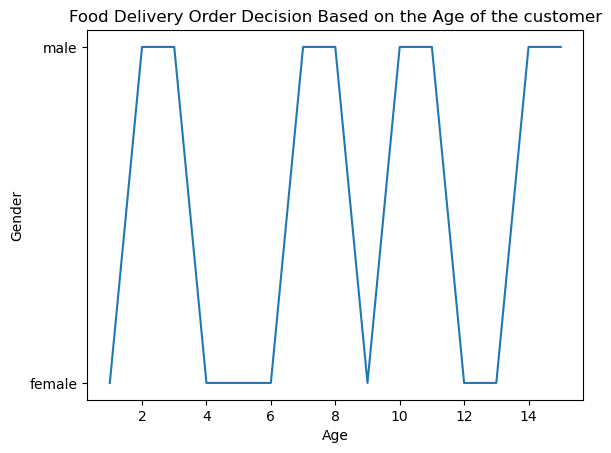

In [11]:
import matplotlib.pyplot as plt
import numpy as np
Age = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
Gender = np.array(['female','male','male','female','female','female','male','male','female','male','male','female','female','male','male'])
plt.plot(Age,Gender)
plt.title("Food Delivery Order Decision Based on the Age of the customer")
plt.xlabel("Age") 
plt.ylabel("Gender") 
plt.show()


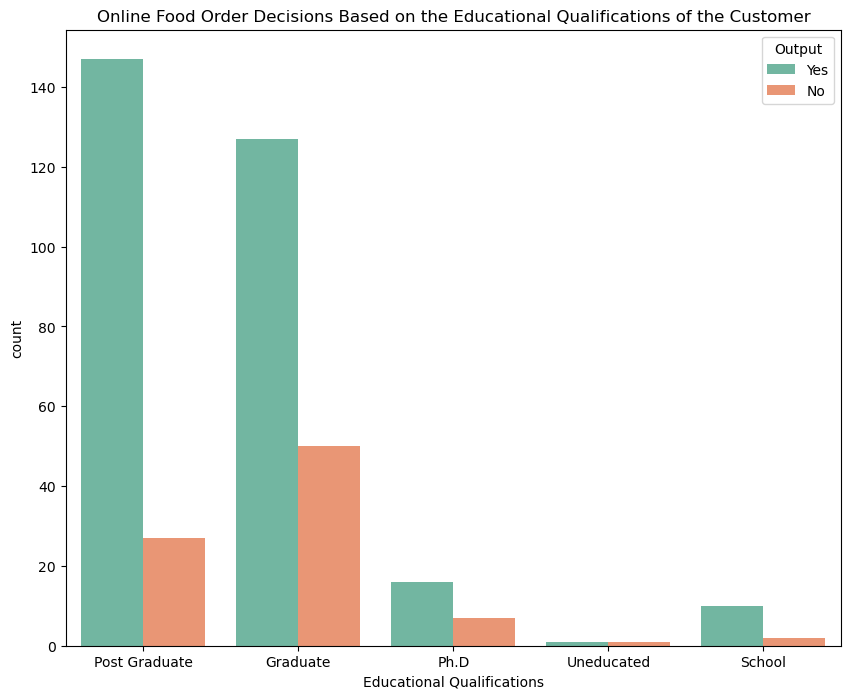

In [12]:
import seaborn as sns 
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Output',palette="Set2");

# Pie Plot

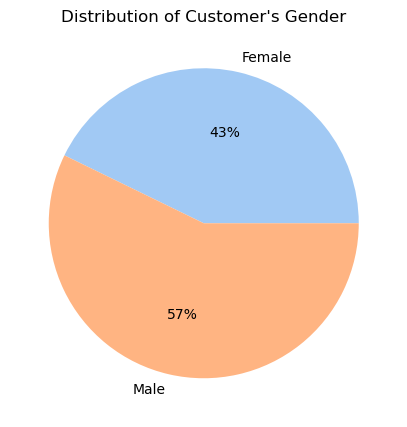

In [13]:
female = len(data[data["Gender"] == 'Female'])
male = len(data[data["Gender"] == 'Male'])
data_gender = [female,male]
labels = ['Female', 'Male']
colors = sns.color_palette('pastel')[0:5] 
plt.figure(figsize=(5,8))
plt.title("Distribution of Customer's Gender")
plt.pie(data_gender, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

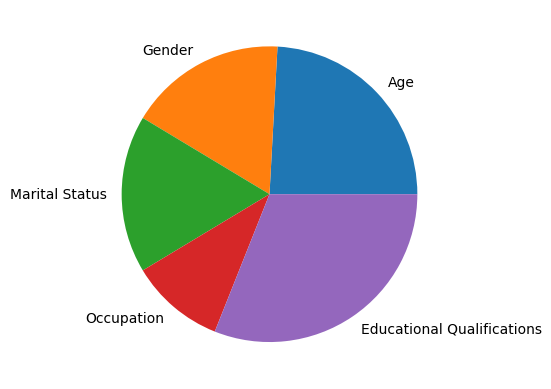

In [14]:
y=np.array([35,25,25,15,45])
var1=["Age","Gender","Marital Status","Occupation","Educational Qualifications"]
plt.pie(y,labels=var1)
plt.show()

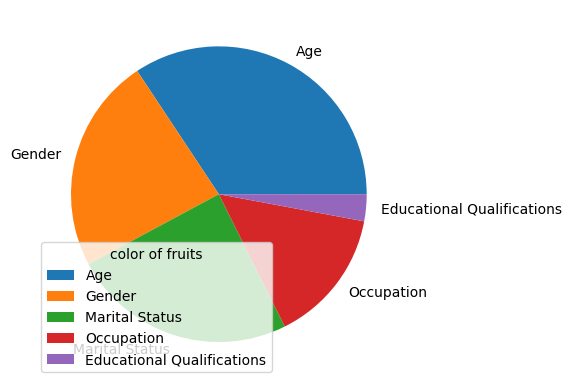

In [15]:
y=np.array([35,24,25,15,3])
mylabels=["Age","Gender","Marital Status","Occupation","Educational Qualifications"]
plt.pie(y,labels=mylabels)
plt.legend(title="color of fruits")
plt.show()

# Scatter Plot

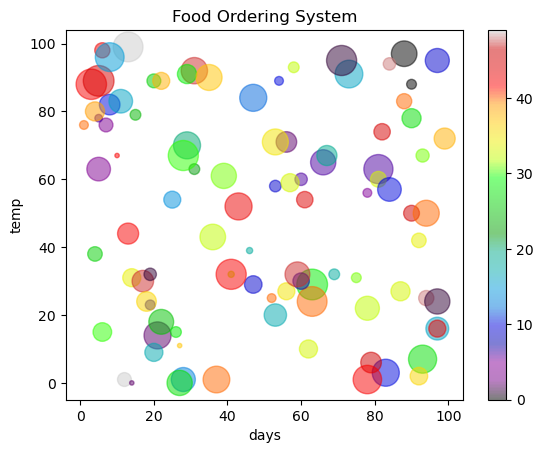

In [16]:
x=np.random.randint(100,size=(100))
y=np.random.randint(100,size=(100))
colors=np.random.randint(50,size=(100))
size= 10 * np.random.randint(50,size=(100))
plt.title("Food Ordering System")
plt.xlabel("days")
plt.ylabel("temp")
plt.scatter(x,y, c=colors, s=size, alpha=.5, cmap='nipy_spectral')
plt.colorbar()
plt.show()

# Pairplot

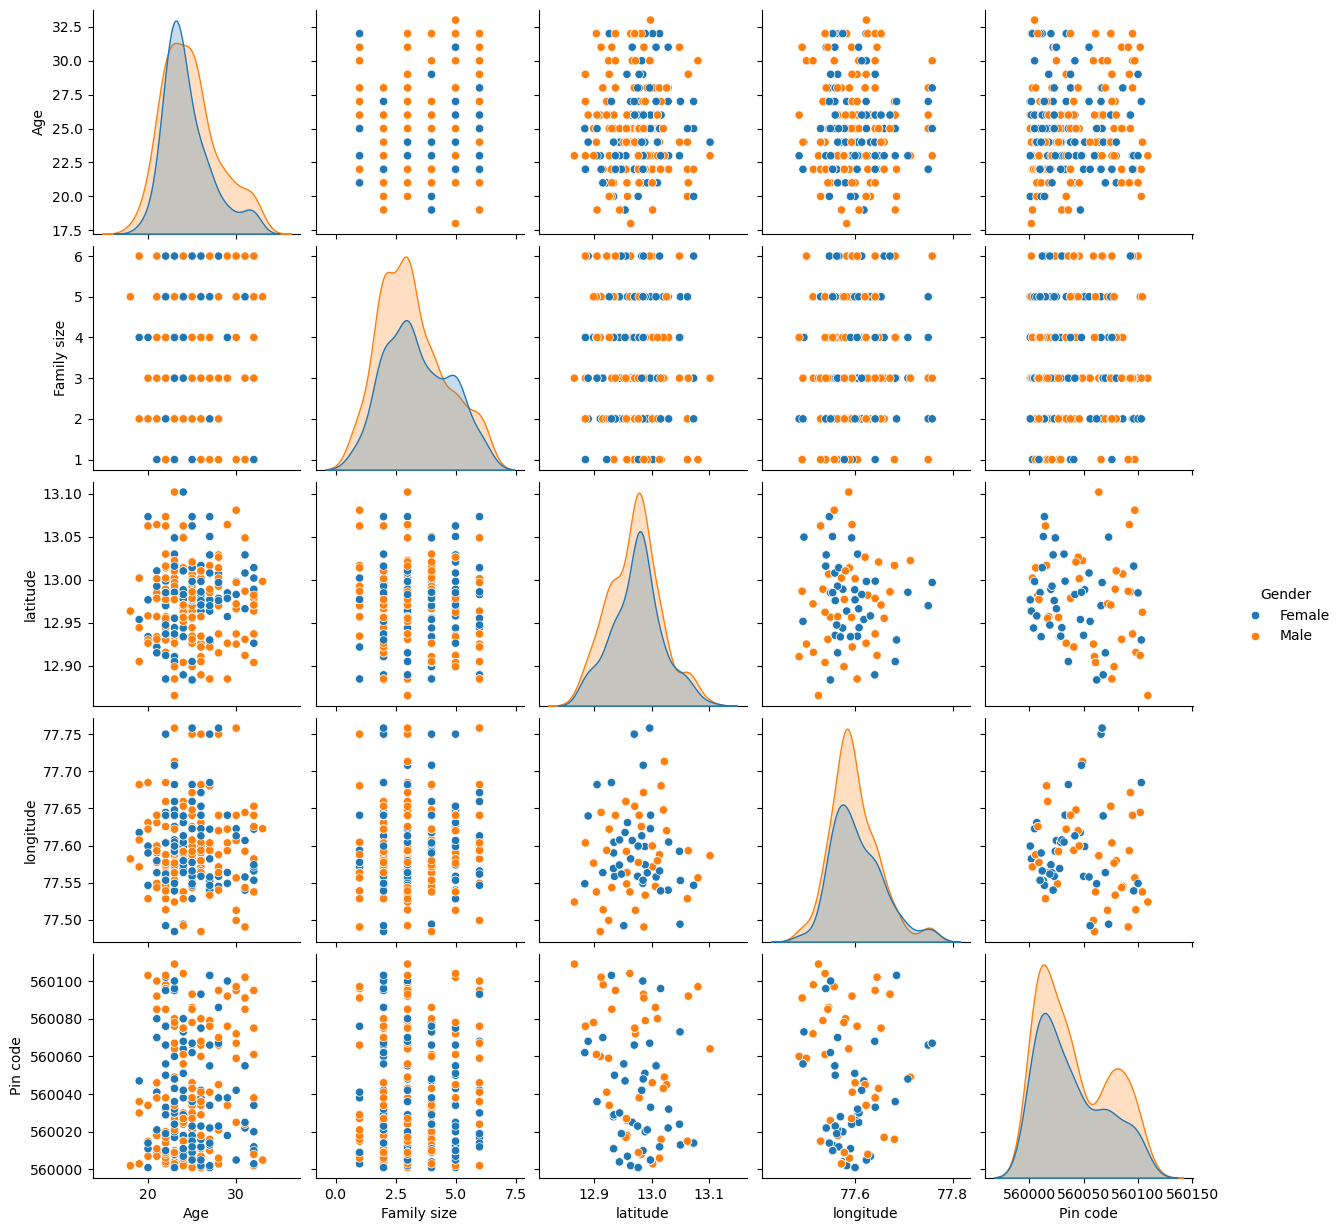

In [17]:
import seaborn as sns
sns.pairplot(data,hue = "Gender")
plt.show()

# Histogram 

In [18]:
age=np.random.randint(18,45,(100))
gender=np.random.randint(15,40,(100))
print(age)
print(gender)

[43 39 21 31 24 29 19 39 24 21 29 39 29 34 23 37 40 30 22 38 28 43 18 21
 24 19 26 43 35 38 37 20 26 22 39 35 38 20 25 42 39 41 19 30 27 39 31 23
 25 44 18 43 32 33 35 41 41 32 20 28 36 29 34 28 42 20 31 31 19 29 26 25
 35 35 21 21 34 33 19 32 43 21 44 35 21 26 31 31 40 37 25 37 18 32 27 43
 33 19 44 22]
[21 31 15 37 15 36 26 24 36 33 30 35 34 35 26 26 34 21 31 19 16 18 29 34
 16 24 19 21 33 31 27 15 28 28 28 25 35 27 33 19 20 33 18 18 23 25 29 19
 20 28 29 36 32 16 17 34 36 36 22 32 36 20 32 21 38 33 19 37 33 18 31 28
 18 35 38 26 36 15 15 25 35 32 38 18 31 18 38 25 29 23 19 25 22 21 31 39
 25 17 38 20]


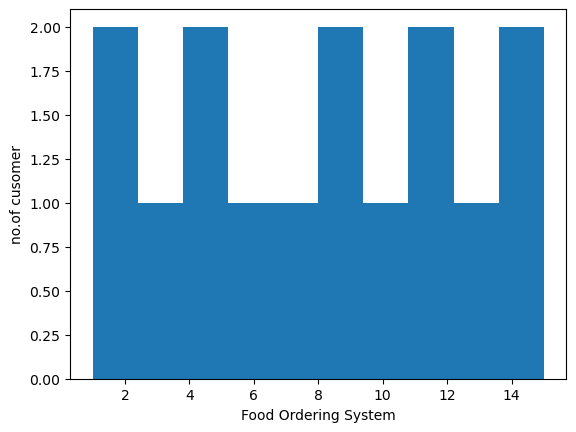

In [19]:
plt.xlabel("Food Ordering System")
plt.ylabel("no.of cusomer")
plt.hist(Age)
plt.show()

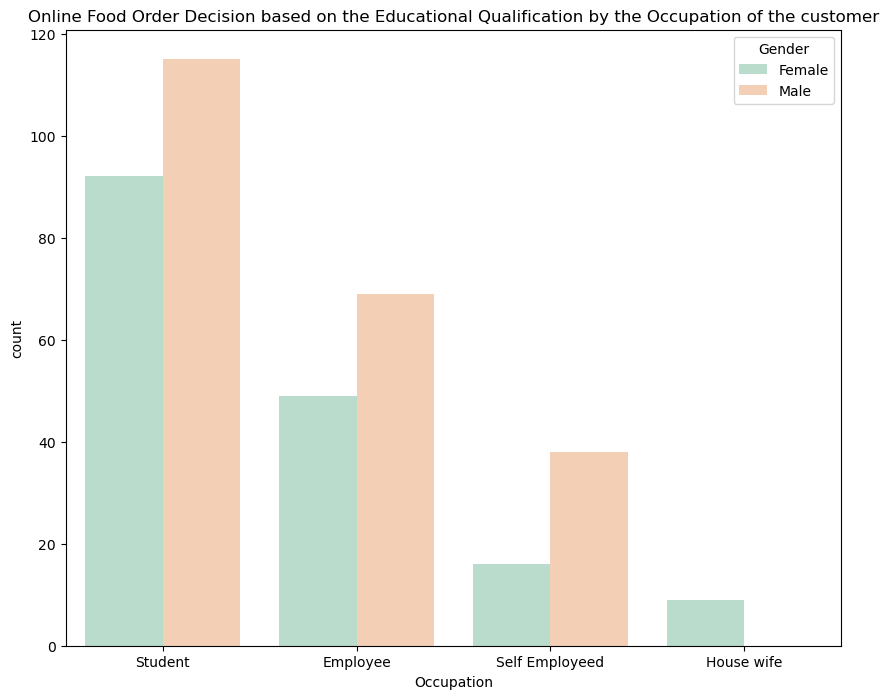

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decision based on the Educational Qualification by the Occupation of the customer")
sns.countplot(x='Occupation',data=data,hue='Gender',palette="Pastel2");

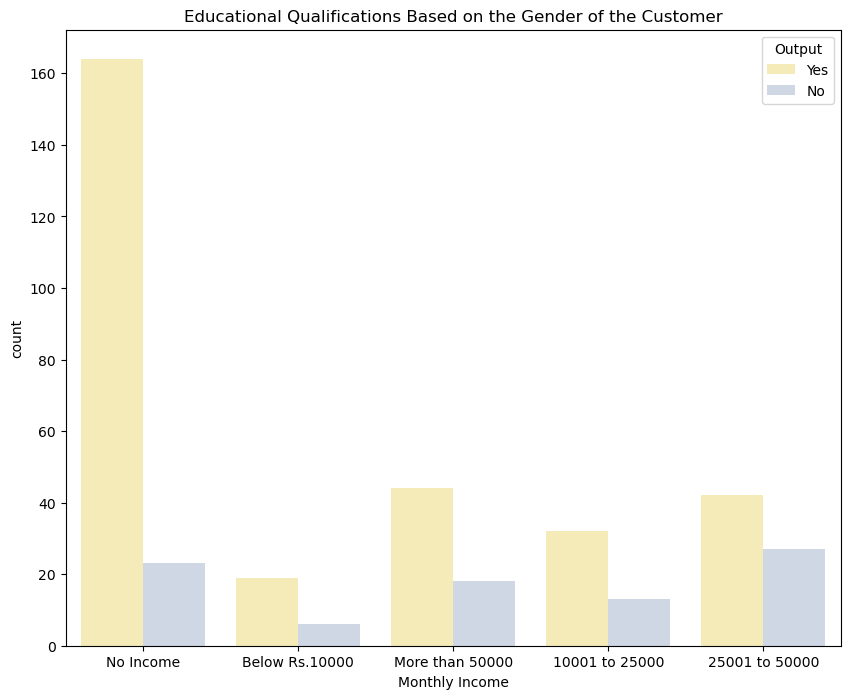

In [21]:
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Monthly Income',data=data,hue='Output',palette="Pastel2_r");

About 76% of customers who order are married.

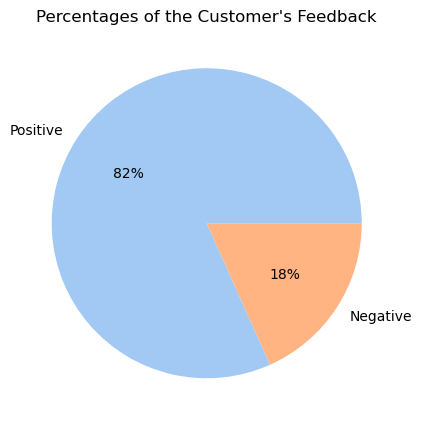

In [22]:
positive = len(data[data["Feedback"] == 'Positive'])
negative = len(data[data["Feedback"] == 'Negative '])
data_feedback = [positive,negative] 
labels = ['Positive', 'Negative']

colors = sns.color_palette('pastel')[0:5] # seaborn color palette to use

plt.figure(figsize=(5,8))
plt.title("Percentages of the Customer's Feedback") 
plt.pie(data_feedback, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Feature Scaling

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [24]:
import pandas as pd
data2 = data[['Age','latitude','longitude','Family size','Pin code']]
data2.head()

,Age,latitude,longitude,Family size,Pin code
0,20,12.9766,77.5993,4,560001
1,24,12.9770,77.5773,3,560009
2,22,12.9551,77.6593,3,560017
3,22,12.9473,77.5616,6,560019
4,22,12.9850,77.5533,4,560010


In [25]:
data3=data2.fillna(data2.mean())

In [26]:
#split Data
X=data3.drop("Age",axis=1)
y=data3["Age"]
print('shape of x=',x.shape)
print('shape of y=',y.shape)

shape of x= (100,)
shape of y= (388,)


In [27]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (310, 4)
Shape of y_train =  (310,)
Shape of X_test =  (78, 4)
Shape of y_test =  (78,)


In [28]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [29]:
sc.mean_

array([1.29728471e+01, 7.75973232e+01, 3.22903226e+00, 5.60039548e+05])

In [30]:
X_train.describe()

,latitude,longitude,Family size,Pin code
count,310.000000,310.000000,310.000000,310.000000
mean,12.972847,77.597323,3.229032,560039.548387
std,0.045072,0.050385,1.344699,31.635504
min,12.865200,77.484200,1.000000,560001.000000
25%,12.936900,77.563700,2.000000,560010.000000
50%,12.977000,77.590000,3.000000,560031.000000
75%,12.998000,77.625600,4.000000,560067.000000
max,13.102000,77.758200,6.000000,560109.000000


In [31]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
X_train_sc

array([[-1.5121865 ,  1.68528703,  0.57426543, -0.11234606],
       [ 0.97230525,  1.65149254,  0.57426543, -0.7455693 ],
       [-1.85663751,  0.84638848,  2.06399165,  0.90081113],
       ...,
       [-0.63661427,  0.20429315,  2.06399165, -0.30231303],
       [-1.98775111, -0.96857449, -0.91546079,  0.71084416],
       [ 0.0922885 , -0.39804396, -0.17059768, -0.96719744]])

In [33]:
X_train_sc =  pd.DataFrame(X_train_sc, columns = ['latitude','longitude	','Family size','Pin code'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ['latitude','longitude','Family size','Pin code'])

In [34]:
X_train_sc.head()

,latitude,longitude\t,Family size,Pin code
0,-1.512187,1.685287,0.574265,-0.112346
1,0.972305,1.651493,0.574265,-0.745569
2,-1.856638,0.846388,2.063992,0.900811
3,0.092288,-0.398044,-1.660324,-0.967197
4,0.630077,0.043272,2.063992,0.204266


In [35]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

# Split Data

In [36]:
X=data3.drop("Age",axis=1)
y=data3["Age"]
print('shape of x=',x.shape)
print('shape of y=',y.shape)

shape of x= (100,)
shape of y= (388,)


In [37]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (310, 4)
Shape of y_train =  (310,)
Shape of X_test =  (78, 4)
Shape of y_test =  (78,)


# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([ 3.47331788, -0.65640955,  0.33392793,  0.01777261])

In [40]:
lr.intercept_

-9923.934833672896

In [41]:
lr.predict(X_test)

array([24.25116304, 24.18473208, 24.20071621, 23.94590384, 25.38796918,
       25.14432693, 23.70649302, 24.85258794, 23.54848179, 23.88240972,
       25.80941542, 24.62356293, 24.94720854, 23.98279053, 24.65064639,
       24.71604993, 24.10809456, 24.7695898 , 24.35813728, 24.289635  ,
       23.56942387, 26.70476774, 24.85258794, 25.86719958, 23.89584589,
       23.9446093 , 24.94639309, 25.05404125, 24.88012881, 25.01079826,
       25.74654342, 25.14296126, 25.28161557, 25.58294589, 24.10173394,
       24.80763162, 24.80763162, 24.89264049, 25.22656842, 25.2522298 ,
       24.93576269, 23.56191796, 23.96306914, 25.12707896, 25.24901795,
       25.2522298 , 24.68032505, 26.09084038, 24.88012881, 26.38975297,
       24.02420935, 24.62356293, 24.58116209, 23.89584589, 23.47197941,
       23.70649302, 23.44023869, 24.23239381, 24.38663854, 25.40815438,
       25.81857221, 24.74978391, 23.70649302, 24.88012881, 23.94542475,
       24.20071621, 24.74330385, 24.81946068, 25.32963643, 25.18

In [42]:
y_test

214    24
335    25
331    25
101    23
239    23
295    24
51     23
148    32
306    23
121    26
357    26
305    24
184    32
270    23
42     23
165    27
145    25
10     22
29     22
284    26
152    20
251    21
209    29
59     25
193    26
332    20
118    32
328    22
67     23
9      23
323    22
303    27
198    23
30     22
156    25
314    24
356    24
61     22
345    22
321    21
192    31
111    25
188    26
301    22
182    22
35     25
137    33
58     31
68     23
327    32
130    28
7      24
106    26
194    24
178    26
386    23
297    22
100    24
115    25
210    27
147    24
354    25
256    23
275    23
183    22
204    25
283    24
213    23
18     25
231    21
39     23
44     22
339    21
375    26
98     26
264    25
202    22
260    30
Name: Age, dtype: int64

In [43]:
lr.score(X_test,y_test)

0.025702228619657763

# Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)

In [45]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [46]:
X_test.head()

,latitude,longitude,Family size,Pin code
214,12.9337,77.5900,4,560011
335,12.9783,77.6408,2,560038
331,12.9048,77.6821,3,560036
101,12.9442,77.6076,2,560030
239,12.9369,77.6407,3,560095


In [47]:
rf.score(X_test,y_test)

0.31910831588099475

In [48]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
print(model.score(Xtest,ytest))

0.358974358974359


# Random Forest Regression algorithm is the best model  for online Food Order prediction Sytem